# Modern Architecture Style Transfer

## Installation and Initialization

In [1]:
%pip install kagglehub

%pip install seaborn
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 5.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/D

In [1]:
import kagglehub

import os
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd 
import numpy as np
import plotly.express as px

/Users/adang40/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Load dataset

In [2]:
import kagglehub

house_dataset = kagglehub.dataset_download("ted8080/house-prices-and-images-socal")
architecture_dataset = kagglehub.dataset_download("tompaulat/modernarchitecture")

print("Path to dataset files:", house_dataset, architecture_dataset)

Path to dataset files: /Users/adang40/.cache/kagglehub/datasets/ted8080/house-prices-and-images-socal/versions/1 /Users/adang40/.cache/kagglehub/datasets/tompaulat/modernarchitecture/versions/7


## Preprocess Arch Images

In [5]:
heights = []
widths = []
names = []
im_array = []
subfolders = ['0-B', 'C-E', 'F-H', 'I-K', 'L-N', 'O-Q', 'R-T', 'U-W', 'X-Z']
number = np.arange(len(subfolders))
# Here we just choose a subfolder, i.e. 'X-Z' with index 8
index = number[8]
# for t in Tags:
for dirname, _, filenames in os.walk(f'{architecture_dataset}/Public Buildings/Public Buildings/{subfolders[index]}'):
    counter = 0
    for filename in filenames:   
        counter += 1
        try:
            im = cv.imread(os.path.join(dirname, filename))
            im_array.append(im)
            heights.append(im.shape[0])
            widths.append(im.shape[1])
            names.append(filename)
        except:
            pass

# Creating a dataframe which saves the filenames, heights, widhts and image array
df_arch = pd.DataFrame({'name':names, 'height':heights, 'width':widths, 'im_array':im_array})
df_arch

,name,height,width,im_array
0,Y N Fine Jewelry Boutique odd Lighting Chair T...,489,528,"[[[236, 232, 231], [236, 232, 231], [236, 233,..."
1,Zhao Zhao Tea Lounge Soar Design Studio Interi...,792,528,"[[[66, 95, 99], [72, 101, 105], [73, 102, 107]..."
2,Zhongguancun IC Design Park MoChen Architects ...,352,528,"[[[187, 160, 139], [187, 160, 139], [187, 160,..."
3,Yishan Pinnacle Flagship Store ARCity Office B...,352,528,"[[[81, 74, 57], [83, 76, 59], [86, 79, 60], [8..."
4,Yuanyijia Flagship Market SSDesign Exterior Ph...,633,528,"[[[244, 224, 206], [244, 224, 206], [244, 224,..."
...,...,...,...,...
609,Yongnian Food Market Julu Foods Group Roarc Re...,351,528,"[[[2, 0, 0], [2, 0, 0], [1, 1, 1], [4, 4, 4], ..."
610,Ya Sa Nan House PVWB Studio Interior Photograp...,352,528,"[[[206, 211, 226], [200, 214, 232], [184, 202,..."
611,Yunshan Town Yuangou Architects Consultants 1S...,352,528,"[[[242, 238, 237], [242, 238, 237], [243, 239,..."
612,Yellow Box Office FLXBL Design Consultancy Fac...,777,528,"[[[19, 8, 4], [19, 8, 4], [19, 8, 4], [19, 8, ..."


### Transform Images into Square

In [7]:
cropped = []
for i, _ in df_arch.iterrows():
    if df_arch.height[i] < df_arch.width[i]:
        cropped.append(cv.resize(df_arch.im_array[i][:, :df_arch.height[i]], (128,128), interpolation=cv.INTER_AREA))
    elif df_arch.height[i] > df_arch.width[i]:
        cropped.append(cv.resize(df_arch.im_array[i][:df_arch.width[i], :], (128,128), interpolation=cv.INTER_AREA))
    else:
        cropped.append(cv.resize(df_arch.im_array[i], (128,128), interpolation=cv.INTER_AREA))
        
df_arch['cropped'] = cropped

## Preprocess SoCal Home Images

In [11]:
heights = []
widths = []
names = []
im_array = []

for dirname, _, filenames in os.walk(f'{house_dataset}/socal2/socal_pics'):
    counter = 0
    for filename in filenames:   
        counter += 1
        try:
            im = cv.imread(os.path.join(dirname, filename))
            im_array.append(im)
            heights.append(im.shape[0])
            widths.append(im.shape[1])
            names.append(filename)
        except:
            pass

# Creating a dataframe which saves the filenames, heights, widhts and image array
df_house = pd.DataFrame({'name':names, 'height':heights, 'width':widths, 'im_array':im_array})
df_house

,name,height,width,im_array
0,9733.jpg,311,415,"[[[124, 126, 120], [115, 120, 111], [105, 112,..."
1,14147.jpg,311,415,"[[[255, 163, 98], [236, 144, 79], [232, 140, 7..."
2,63.jpg,311,415,"[[[200, 188, 176], [192, 180, 168], [187, 175,..."
3,6400.jpg,311,415,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,13628.jpg,311,415,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...,...
15469,8434.jpg,311,415,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
15470,7707.jpg,311,415,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
15471,6419.jpg,311,415,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
15472,1376.jpg,311,415,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


### Transform Images into Square

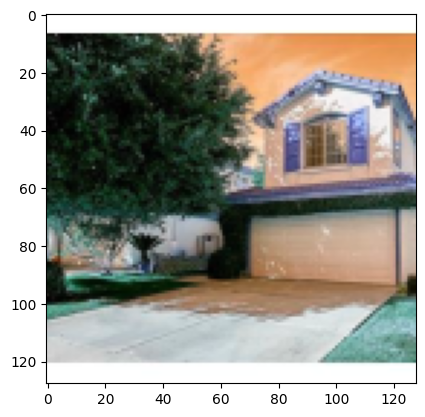

In [12]:
cropped = []
for i, _ in df_house.iterrows():
    if df_house.height[i] < df_house.width[i]:
        cropped.append(cv.resize(df_house.im_array[i][:, :df_house.height[i]], (128,128), interpolation=cv.INTER_AREA))
    elif df_house.height[i] > df_house.width[i]:
        cropped.append(cv.resize(df_house.im_array[i][:df_house.width[i], :], (128,128), interpolation=cv.INTER_AREA))
    else:
        cropped.append(cv.resize(df_house.im_array[i], (128,128), interpolation=cv.INTER_AREA))
        
df_house['cropped'] = cropped

img = df_house.cropped.loc[256]
plt.imshow(img)